In [2]:
"""
Stochastic Calculus
Week 1. Wiener process
"""

import pandas as pd
import numpy as np
import seaborn as sns
from numpy import exp, log, sqrt, max, min, mean

In [3]:
def get_time(T=1, n=1000):
  return np.linspace(start=0, stop=T, num=n + 1)

In [4]:
get_time(T=2, n=20)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

In [5]:
def get_wiener_increments(T=1, n=1000, seed=None):
  rng = np.random.default_rng(seed)
  sd = sqrt(T / n)
  delta_w = rng.normal(loc=0, scale=sd, size=n)
  return delta_w

In [9]:
get_wiener_increments(T=2, n=20)

array([ 0.02287486, -0.22935497, -0.00377392,  0.10216404,  0.26574383,
        0.41859904, -0.13429646,  0.02278576, -0.04764399, -0.13092386,
       -0.26249335, -0.1711074 , -0.2422491 , -0.41382211,  0.1124581 ,
        0.09915468,  0.71742872,  0.10984614, -0.02722282, -0.20106679])

In [10]:
def get_wiener_trajectory(T=1, n=1000, seed=None):
  delta_w = get_wiener_increments(T=T, n=n, seed=seed)
  w = np.zeros(n + 1)
  w[1:(n + 1)] = np.cumsum(delta_w)
  return w

In [11]:
get_wiener_trajectory(T=2, n=20)

array([ 0.        , -0.46616463, -0.318945  , -0.66834137, -0.51489475,
       -0.06420778, -0.5434904 , -0.90882832, -0.72832113, -1.09392324,
       -1.0622033 , -0.89709966, -1.18974234, -1.14562205, -1.18212586,
       -1.15511635, -1.70996274, -1.92732281, -1.46829469, -1.07686507,
       -1.34864565])

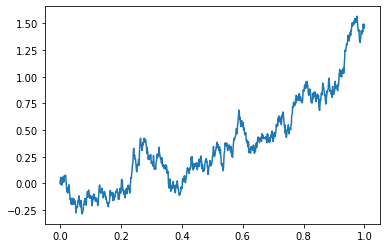

In [12]:
sns.lineplot(x=get_time(), y=get_wiener_trajectory())

In [13]:
# Calculate the probability that W_t will hit 3 before T=2

In [16]:
T = 2
n = 5000
n_sim = 10000
good_traj = 0

for i in range(n_sim):
  w = get_wiener_trajectory(T, n)
  if max(w) > 3:
    good_traj += 1
  

good_traj / n_sim 

0.0334